In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [284]:
df_india = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/covid_19_india.csv")
df_individual = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/IndividualDetails.csv")
df_population = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/population_india_census2011.csv")
df_imcrt = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/ICMRTestingDetails.csv")
df_hospital_bed = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/HospitalBedsIndia.csv")
df_age_group = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/AgeGroupDetails.csv")

In [285]:
df_india['ConfirmedIndianNational'] = df_india.ConfirmedIndianNational.replace('-',0)
df_india['ConfirmedForeignNational'] = df_india.ConfirmedForeignNational.replace('-',0)
df_india['ConfirmedIndianNational']= df_india['ConfirmedIndianNational'].astype('int64')
df_india['ConfirmedForeignNational']= df_india['ConfirmedForeignNational'].astype('int64')

In [286]:
df_india['Total Cases'] = df_india['Confirmed']
df_india['Active Cases'] = df_india['Total Cases'] - df_india['Cured'] - df_india['Deaths']

In [287]:
df_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3


In [288]:
df_india['ConfirmedIndianNational'].value_counts()

1      108
0       97
3       73
2       33
4       21
      ... 
49       1
46       1
41       1
45       1
177      1
Name: ConfirmedIndianNational, Length: 61, dtype: int64

In [289]:
df_india['ConfirmedForeignNational'].value_counts()

0     397
1      39
2      36
14     25
3      12
10      6
8       5
7       3
6       3
11      2
9       1
Name: ConfirmedForeignNational, dtype: int64

In [290]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 11 columns):
Sno                         529 non-null int64
Date                        529 non-null object
Time                        529 non-null object
State/UnionTerritory        529 non-null object
ConfirmedIndianNational     529 non-null int64
ConfirmedForeignNational    529 non-null int64
Cured                       529 non-null int64
Deaths                      529 non-null int64
Confirmed                   529 non-null int64
Total Cases                 529 non-null int64
Active Cases                529 non-null int64
dtypes: int64(8), object(3)
memory usage: 45.6+ KB


In [291]:
df_india['State/UnionTerritory'].nunique()

30

In [292]:
df_india["Date"] = pd.to_datetime(df_india["Date"],infer_datetime_format=True,dayfirst=True)

In [293]:
df_india.shape

(529, 11)

In [294]:
df_india=df_india.drop(["Sno"],axis=1)

In [295]:
df_india.isnull().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
Total Cases                 0
Active Cases                0
dtype: int64

In [296]:
# df_india = df_india.drop(df_india.columns[7:],axis=1)
# df_india_srt = df_india.sort_values('Date', ascending=True)
# df_india_srt
# df_india.set_index('Date').groupby(pd.Grouper(freq='D')).mean()

In [297]:
df_india_date_wise = df_india.groupby(['Date','State/UnionTerritory','Total Cases'])['Cured','Deaths','Active Cases'] \
            .sum().reset_index().sort_values('Total Cases',ascending = False)

In [298]:
# df_india_date_wise=df_india_date_wise.drop(["Sno"],axis=1)
df_india_date_wise

,Date,State/UnionTerritory,Total Cases,Cured,Deaths,Active Cases
513,2020-03-31,Kerala,234,19,1,214
516,2020-03-31,Maharashtra,216,39,9,168
485,2020-03-30,Kerala,202,19,1,182
488,2020-03-30,Maharashtra,198,25,8,165
461,2020-03-29,Maharashtra,186,25,6,155
...,...,...,...,...,...,...
296,2020-03-23,Chhattisgarh,1,0,0,1
112,2020-03-12,Jammu and Kashmir,1,0,0,1
62,2020-03-07,Tamil Nadu,1,0,0,1
63,2020-03-07,Telengana,1,0,0,1


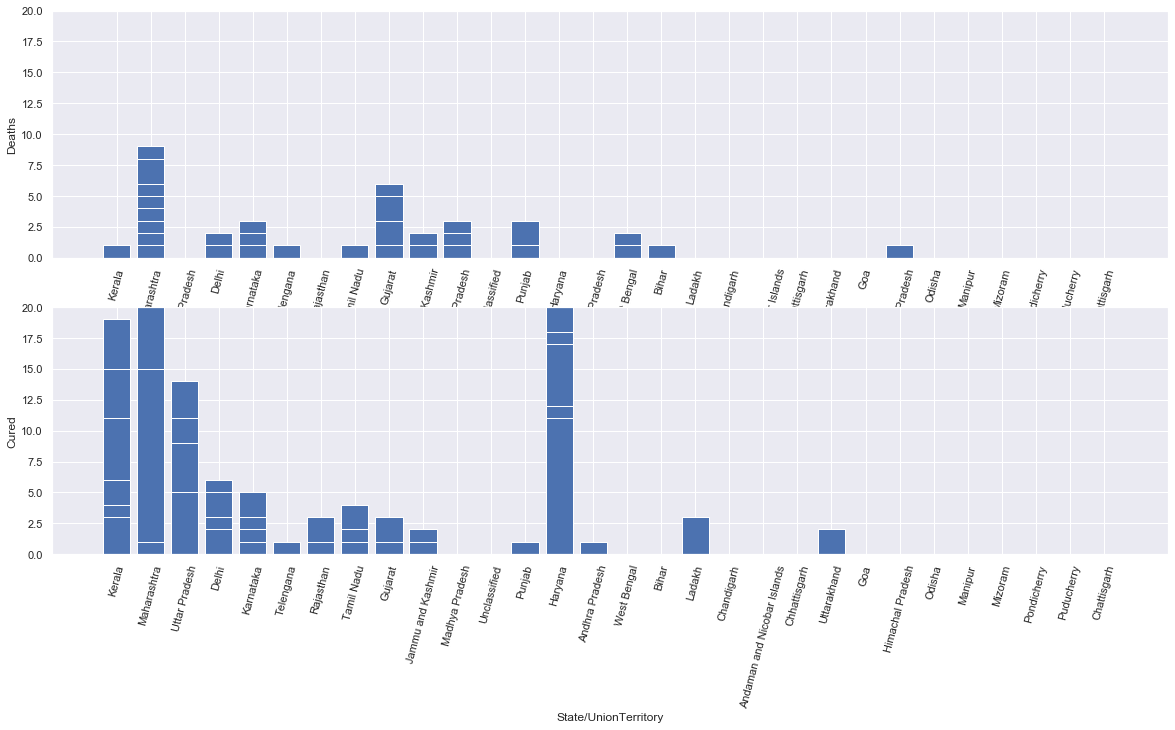

In [299]:
# df_india_date_wise.sort_values(by='Date')
# print(df_india_date_wise.columns) df.sort('Date')
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Deaths"])
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.xticks(rotation=75)
plt.ylim(0, 20)
plt.xlabel("State/UnionTerritory")
plt.ylabel("Deaths")

plt.subplot(2,1,2)
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Cured"])
plt.xlabel("State/UnionTerritory")
plt.ylabel("Cured")
plt.ylim(0, 20)

plt.xticks(rotation=75)
plt.show()

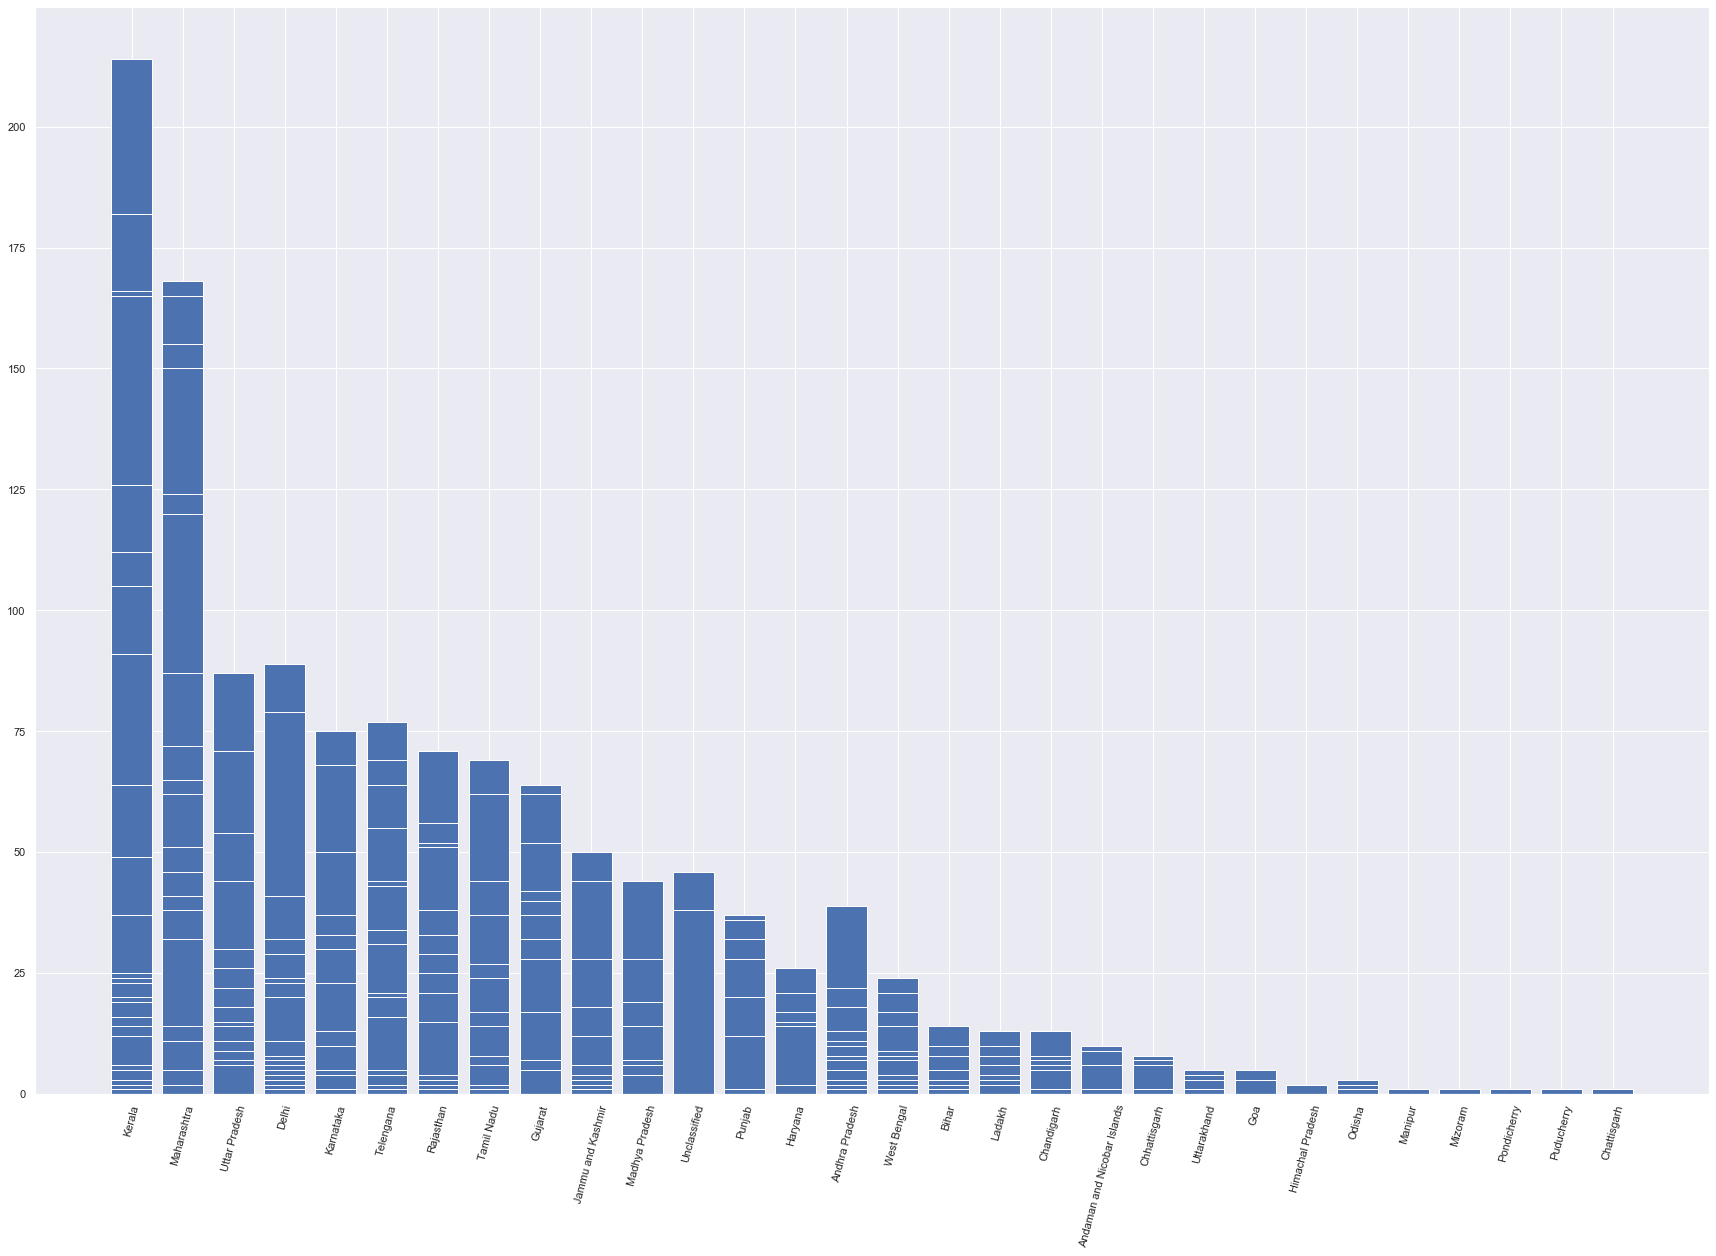

In [300]:
plt.figure(figsize=(30,20))
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Active Cases"])
plt.xticks(rotation=75)
plt.show()

In [301]:
tmp = df_india_date_wise.groupby(['Date'])["Active Cases","Cured","Deaths","State/UnionTerritory"].sum().reset_index()


In [302]:
# tmp["Date"] = pd.to_datetime(tmp["Date"],infer_datetime_format=True)

In [303]:
tmp.tail(10)

,Date,Active Cases,Cured,Deaths
52,2020-03-22,329,24,7
53,2020-03-23,402,24,7
54,2020-03-24,470,40,9
55,2020-03-25,553,43,10
56,2020-03-26,634,45,15
57,2020-03-27,640,67,17
58,2020-03-28,810,80,19
59,2020-03-29,901,96,27
60,2020-03-30,1118,102,31
61,2020-03-31,1238,124,35


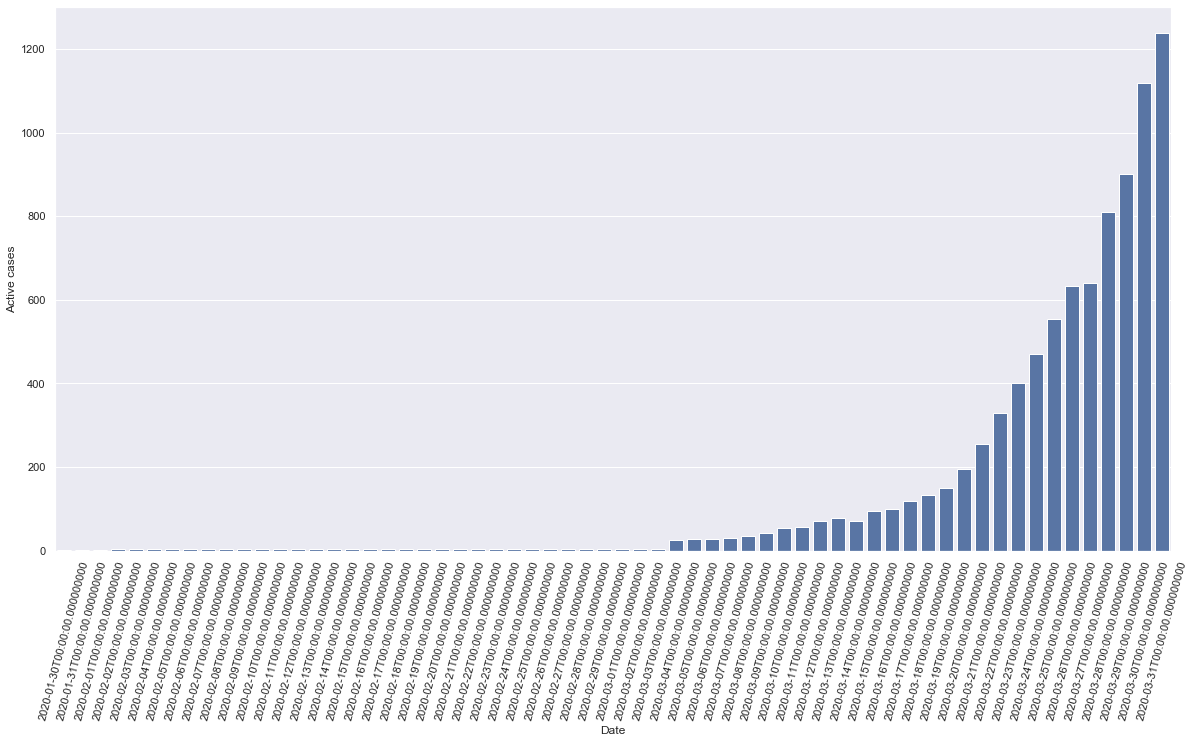

In [304]:
plt.figure(figsize=(20,10))
sns.barplot(tmp["Date"],tmp["Active Cases"],color="b")
plt.xticks(rotation=75)
plt.xlabel("Date")
plt.ylabel("Active cases")
plt.show()

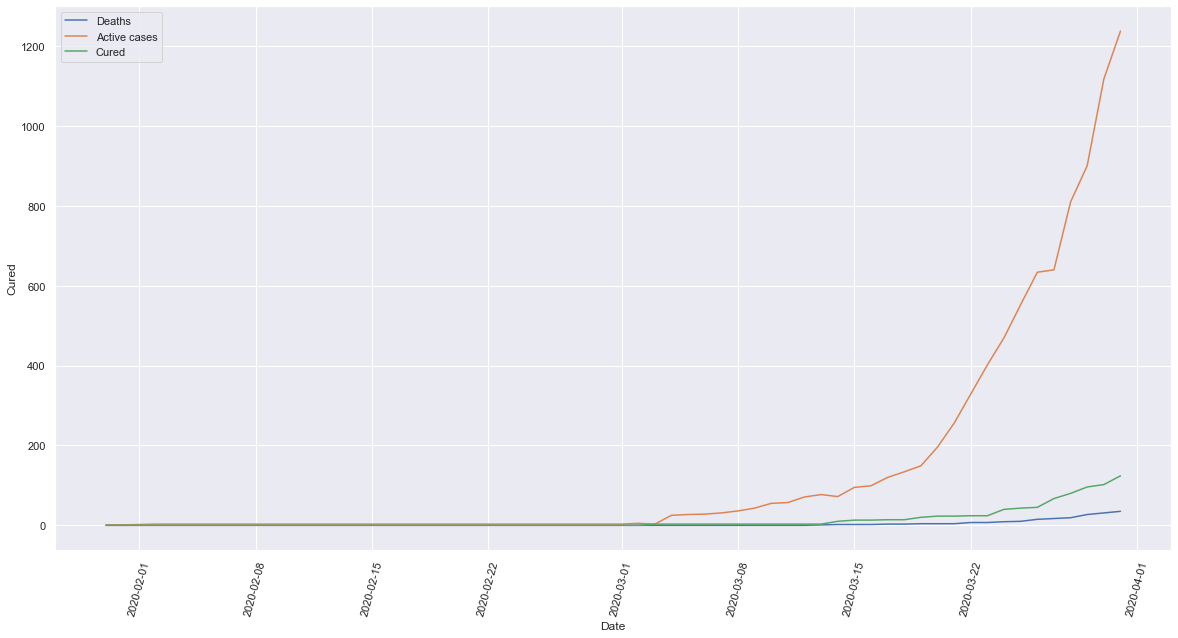

In [305]:
plt.figure(figsize=(20,10))
sns.lineplot(tmp["Date"],tmp["Deaths"])
sns.lineplot(tmp["Date"],tmp["Active Cases"])
sns.lineplot(tmp["Date"],tmp["Cured"])
plt.xticks(rotation=75)
plt.legend(["Deaths","Active cases","Cured"])
plt.show()

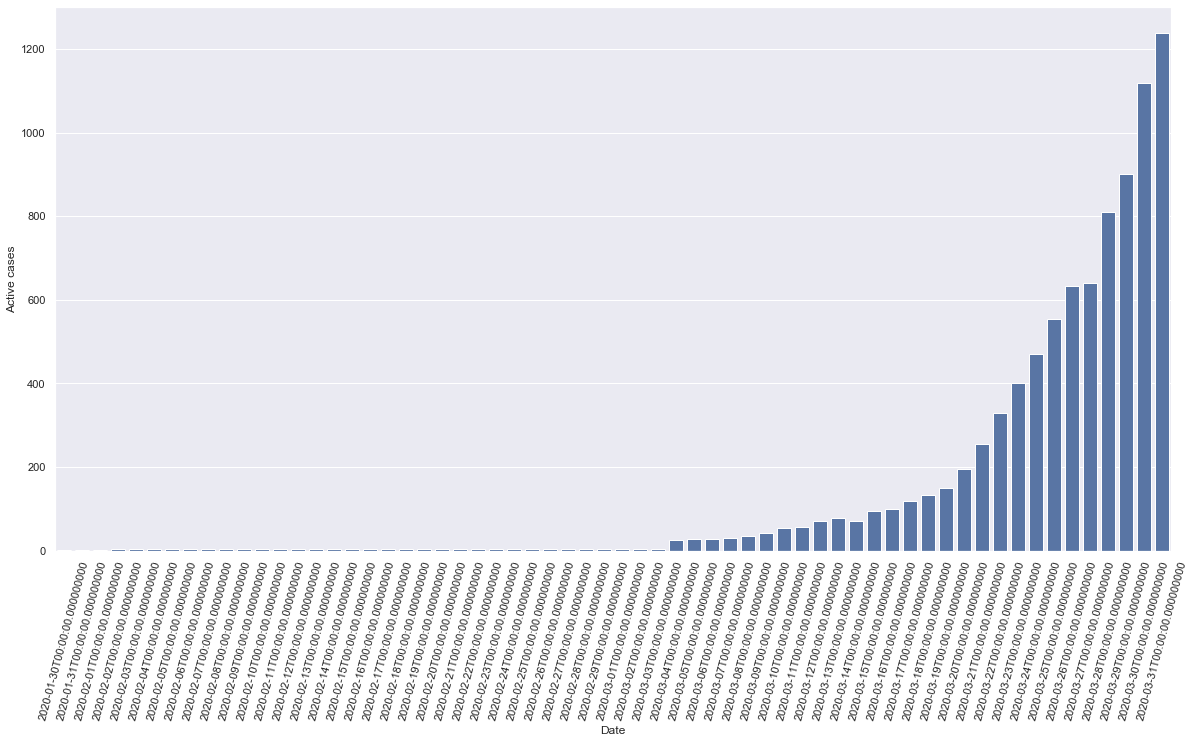

In [306]:
plt.figure(figsize=(20,10))
sns.barplot(tmp["Date"],tmp["Active Cases"],color="b")
plt.xticks(rotation=75)
plt.xlabel("Date")
plt.ylabel("Active cases")
plt.show()

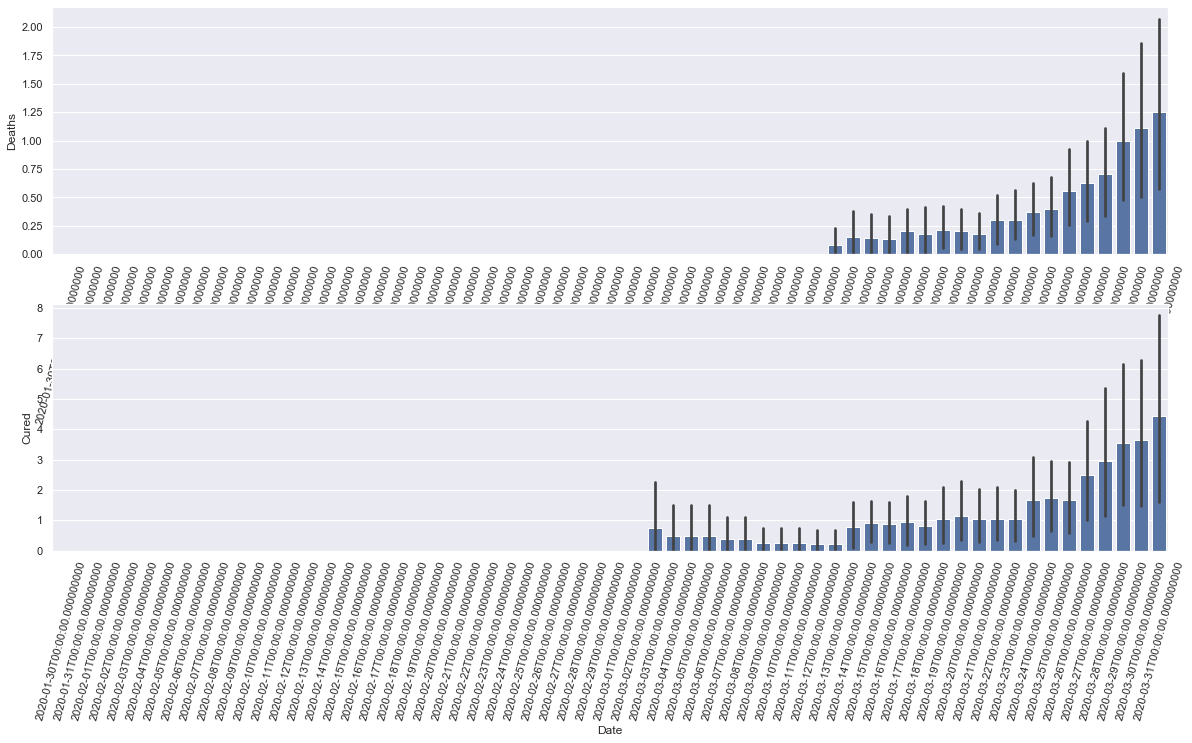

In [310]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(df_india["Date"],df_india["Deaths"],color="b")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.xticks(rotation=75)
# indices = range(len(df_india["Date"].unique()))
# width = np.min(np.diff(indices))/3.
plt.subplot(2,1,2)
sns.barplot(df_india["Date"],df_india["Cured"],color="b")

plt.xlabel("Date")
plt.ylabel("Cured")

plt.xticks(rotation=75)
plt.show()


In [311]:
range(len(df_india["Date"].unique()))

range(0, 62)

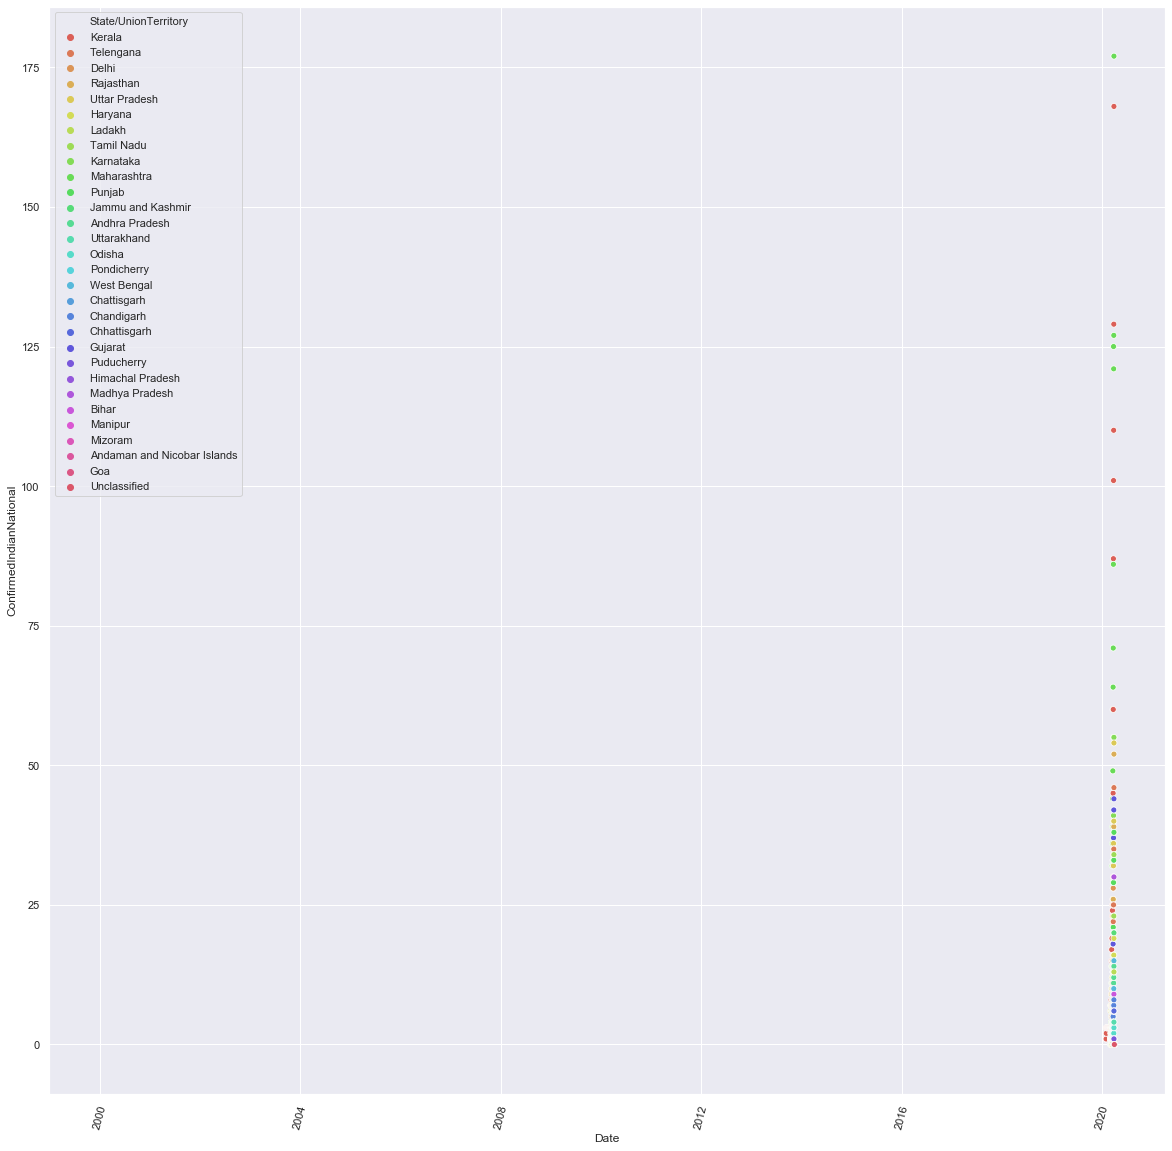

In [313]:
plt.figure(figsize=(20,20))
# df_india_srt = df_india.sort_values('Date', ascending=True)
palette = sns.color_palette("hls", 30)
# x_dates = [pd.to_datetime(df_india["Date"],infer_datetime_format=True)]
sns.scatterplot(df_india["Date"],df_india["ConfirmedIndianNational"],sizes=(40, 400),hue=df_india["State/UnionTerritory"],palette=palette)
plt.xticks(rotation=75)
plt.show()

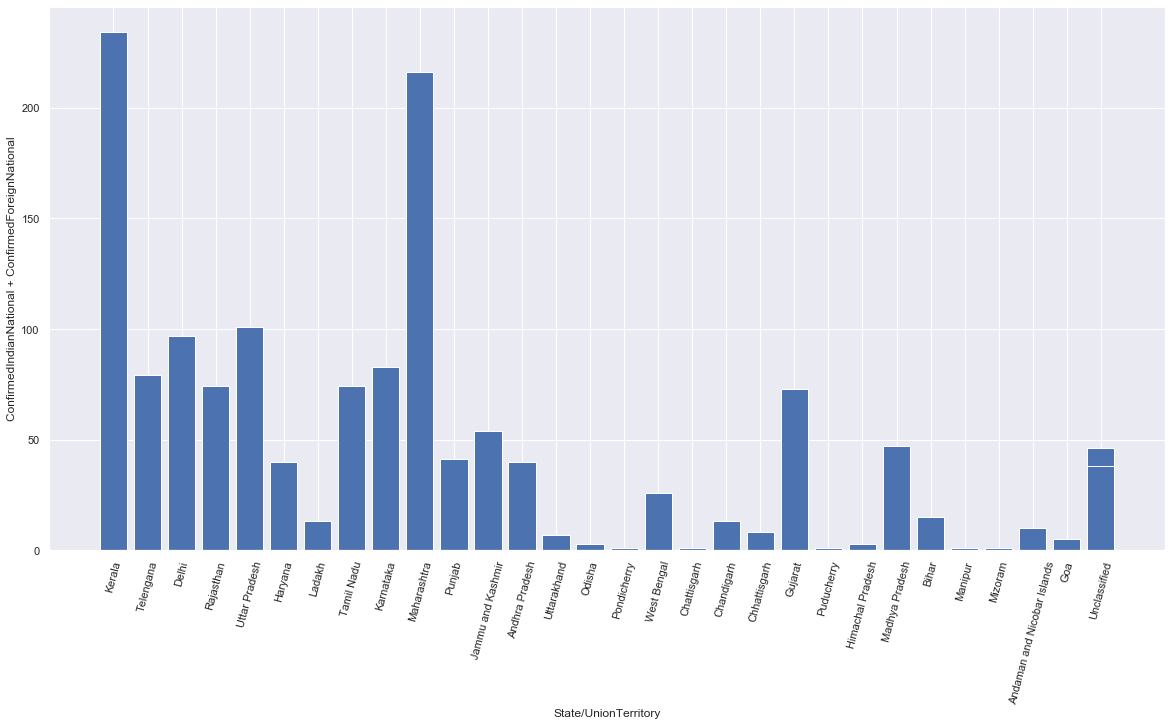

In [315]:
plt.figure(figsize=(20,10))
plt.bar(df_india["State/UnionTerritory"],df_india["Confirmed"])
plt.xlabel("State/UnionTerritory")
plt.ylabel("ConfirmedIndianNational + ConfirmedForeignNational")
plt.xticks(rotation=75)
plt.show()

In [316]:
# df_india["State/UnionTerritory"].value_counts()

In [317]:
df_india_date_wise["Date"] = pd.to_datetime(df_india_date_wise["Date"],infer_datetime_format=True)

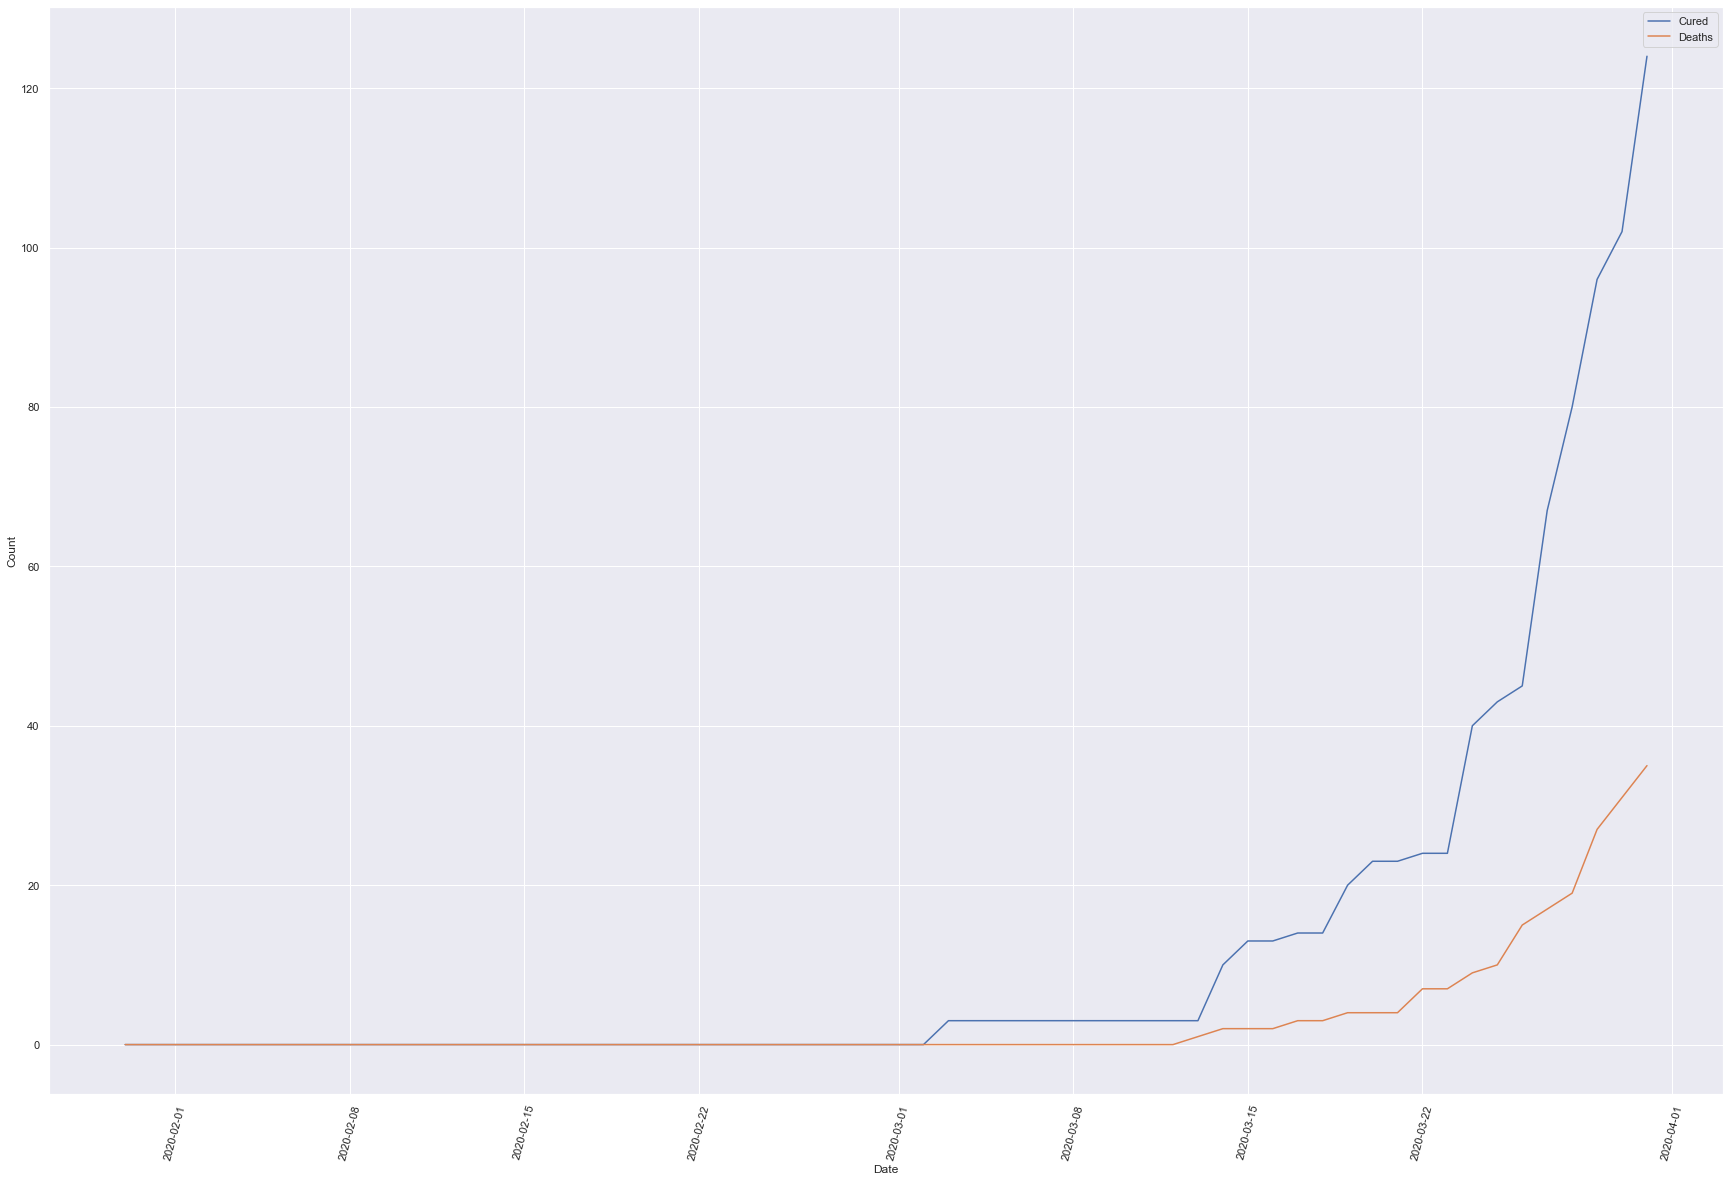

In [318]:
plt.figure(figsize=(30,20))
sns.lineplot(tmp["Date"],tmp["Cured"])
sns.lineplot(tmp["Date"],tmp["Deaths"])
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.legend(["Cured","Deaths"])
plt.show()

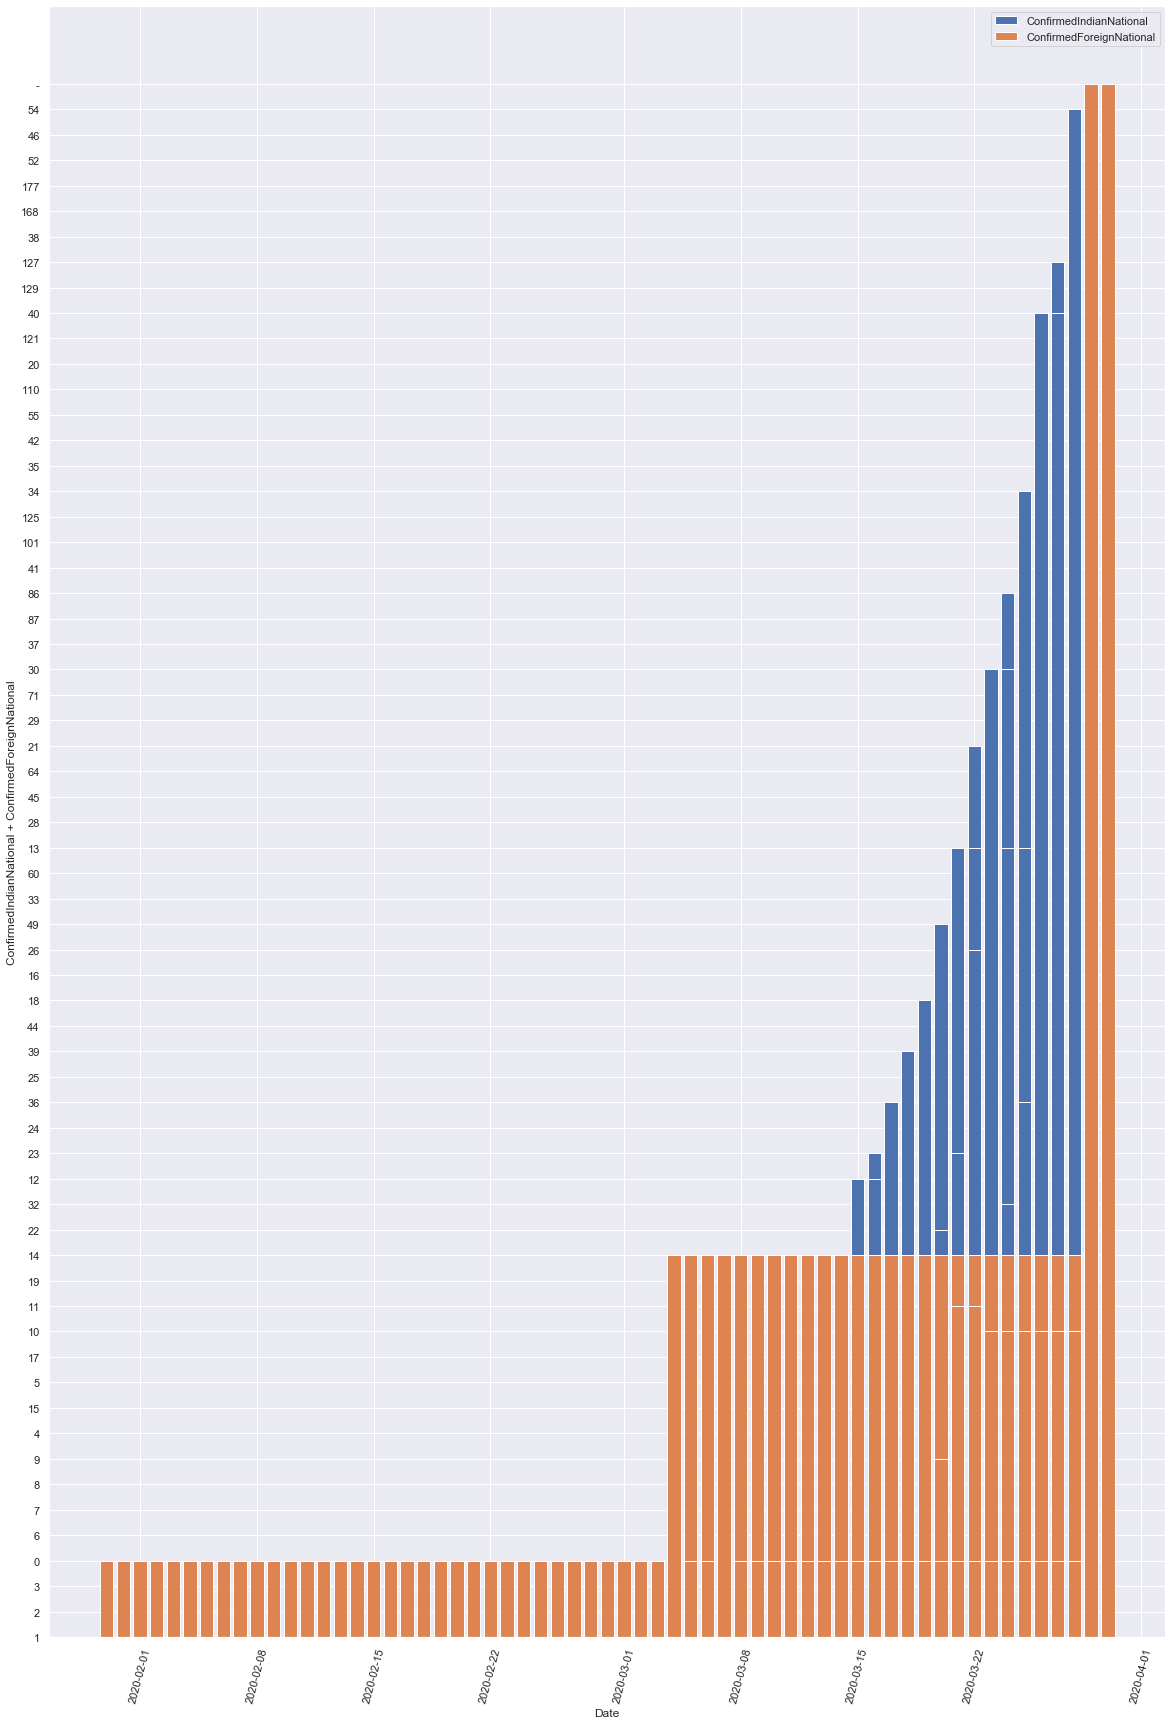

In [132]:
plt.figure(figsize=(20,30))
plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.bar(df_india["Date"],df_india["ConfirmedForeignNational"])
plt.xlabel("Date")
plt.xticks(rotation=75)
plt.ylabel("ConfirmedIndianNational + ConfirmedForeignNational")
plt.legend(["ConfirmedIndianNational","ConfirmedForeignNational"])
plt.show()

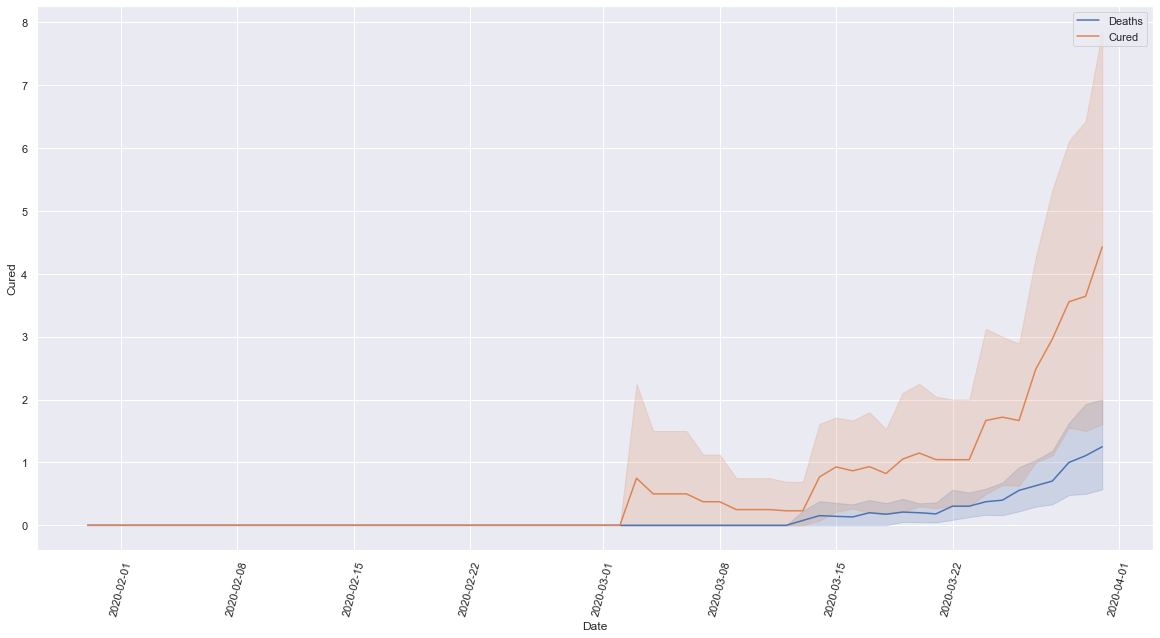

In [319]:
plt.figure(figsize=(20,10))
sns.lineplot(df_india["Date"],df_india["Deaths"])
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
sns.lineplot(df_india["Date"],df_india["Cured"])
plt.legend(["Deaths","Cured"])
plt.xticks(rotation=75)
plt.show()

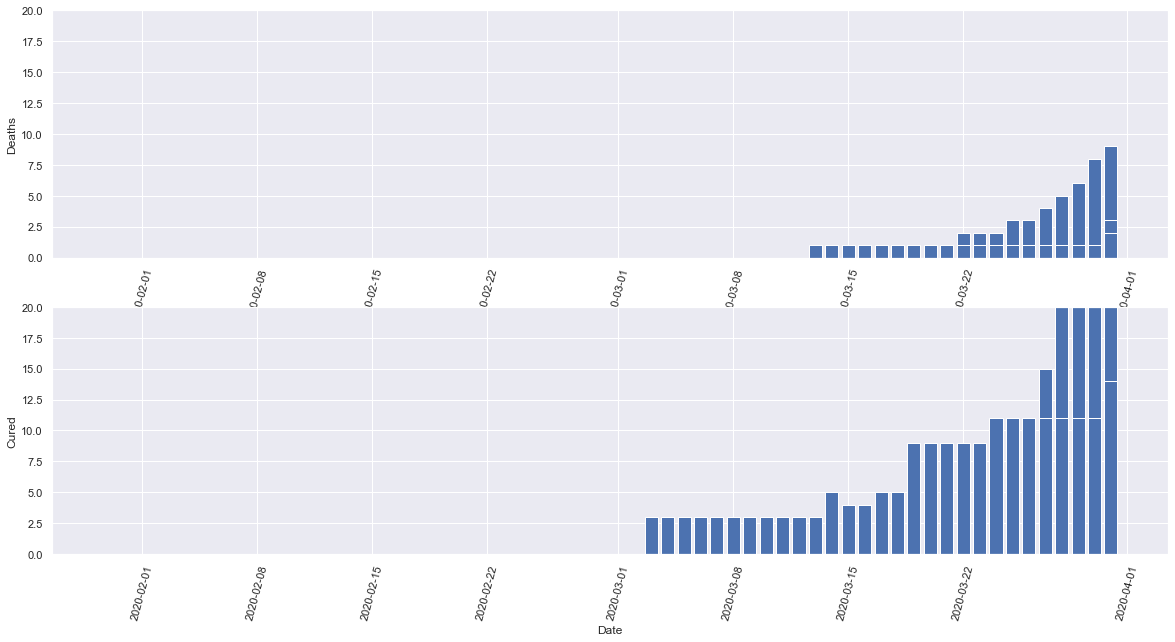

In [320]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.bar(df_india["Date"],df_india["Deaths"])
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.xticks(rotation=75)
plt.ylim(0, 20)
plt.xlabel("Date")
plt.ylabel("Deaths")

plt.subplot(2,1,2)
plt.bar(df_india["Date"],df_india["Cured"])
plt.xlabel("Date")
plt.ylabel("Cured")
plt.ylim(0, 20)

plt.xticks(rotation=75)
plt.show()

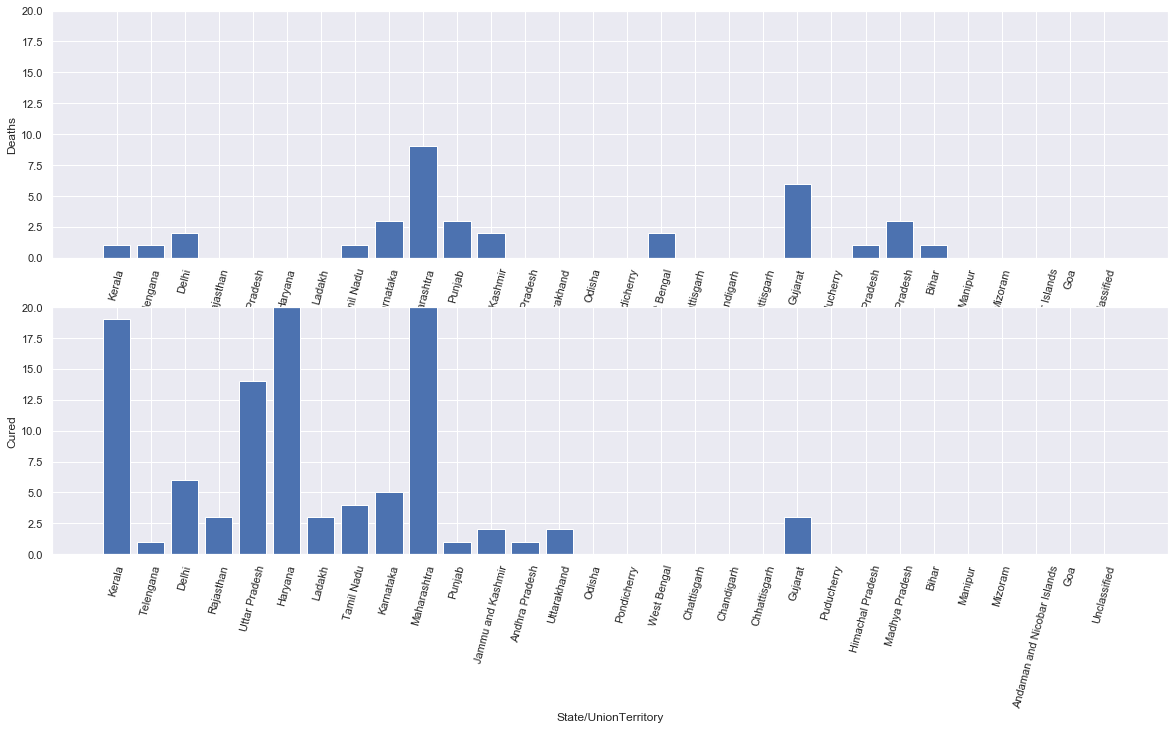

In [321]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.bar(df_india["State/UnionTerritory"],df_india["Deaths"])
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.xticks(rotation=75)
plt.ylim(0, 20)
plt.xlabel("State/UnionTerritory")
plt.ylabel("Deaths")

plt.subplot(2,1,2)
plt.bar(df_india["State/UnionTerritory"],df_india["Cured"])
plt.xlabel("State/UnionTerritory")
plt.ylabel("Cured")
plt.ylim(0, 20)

plt.xticks(rotation=75)
plt.show()

In [324]:
# temp = date_wise_data.melt(id_vars="Date", value_vars=['Cured', 'Deaths', 'Confirmed'],
#                  var_name='Case', value_name='Count')

In [325]:
df_individual = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/IndividualDetails.csv")

In [326]:
df_individual.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,NaN


In [327]:
df_individual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 12 columns):
id                    1304 non-null int64
government_id         257 non-null object
diagnosed_date        1304 non-null object
age                   485 non-null object
gender                533 non-null object
detected_city         643 non-null object
detected_district     955 non-null object
detected_state        1085 non-null object
nationality           414 non-null object
current_status        1085 non-null object
status_change_date    1082 non-null object
notes                 1060 non-null object
dtypes: int64(1), object(11)
memory usage: 122.4+ KB


In [328]:
# df_individual["Diagnosed date"] = pd.to_datetime(df_individual["Diagnosed date"],infer_datetime_format=True)
df_individual['gender']=df_individual['gender'].fillna("UNK")

In [329]:
df_individual["age"] = df_individual["age"].fillna(0)
df_individual["age"] = df_individual['age'].replace('28-35',32)

In [330]:
df_individual['diagnosed_date']=pd.to_datetime(df_individual['diagnosed_date'],dayfirst=True,infer_datetime_format=True)

In [331]:
df_individual['current_status'].value_counts()

Hospitalized    1023
Recovered         43
Deceased          18
Migrated           1
Name: current_status, dtype: int64

In [332]:
df_individual.isnull().sum()

id                       0
government_id         1047
diagnosed_date           0
age                      0
gender                   0
detected_city          661
detected_district      349
detected_state         219
nationality            890
current_status         219
status_change_date     222
notes                  244
dtype: int64

In [333]:
df_individual[df_individual['detected_state'].isnull()]

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
1085,1085,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1086,1086,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1087,1087,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1088,1088,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1089,1089,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1299,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,1300,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1301,1301,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1302,1302,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
df_individual['gender'].value_counts()

UNK    771
M      351
F      182
Name: gender, dtype: int64

In [349]:
df_individual_tmp = df_individual

In [350]:
df_individual_tmp.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,2020-01-30,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,2020-02-02,0,UNK,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,2020-02-03,0,UNK,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,2020-03-02,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,2020-03-02,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,NaN


In [351]:
df_individual_tmp["age"].value_counts()

0     819
21     23
32     20
24     19
55     18
     ... 
13      1
14      1
81      1
89      1
96      1
Name: age, Length: 73, dtype: int64

In [352]:
df_individual_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 12 columns):
id                    1304 non-null int64
government_id         257 non-null object
diagnosed_date        1304 non-null datetime64[ns]
age                   1304 non-null int64
gender                1304 non-null object
detected_city         643 non-null object
detected_district     955 non-null object
detected_state        1085 non-null object
nationality           414 non-null object
current_status        1085 non-null object
status_change_date    1082 non-null object
notes                 1060 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 122.4+ KB


In [353]:
df_individual_tmp['age']= df_individual_tmp['age'].astype('int64')

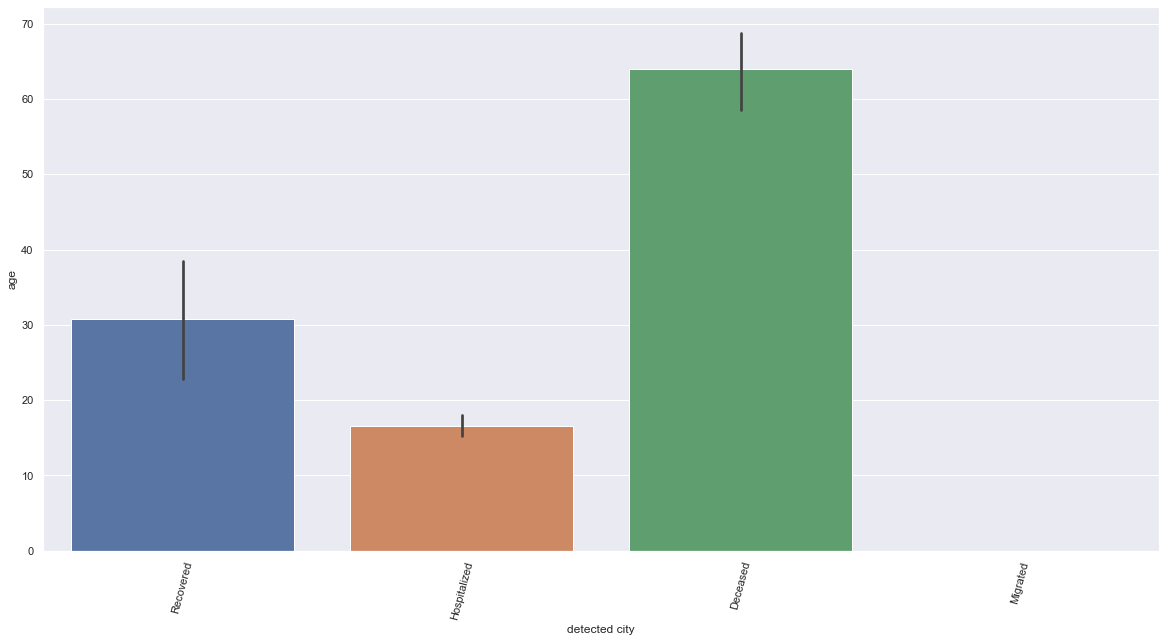

In [354]:
plt.figure(figsize=(20,10))
sns.barplot(df_individual_tmp["current_status"],df_individual_tmp["age"])
plt.xlabel("detected city")
plt.xticks(rotation=75)
plt.ylabel("age")
plt.show()

In [355]:
df_individual['gender'].value_counts()/len(df_individual['gender'])*100

UNK    59.125767
M      26.917178
F      13.957055
Name: gender, dtype: float64

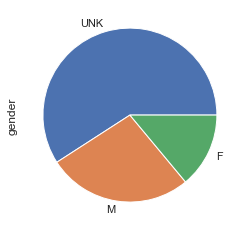

In [356]:
df_individual['gender'].value_counts().plot(kind='pie')

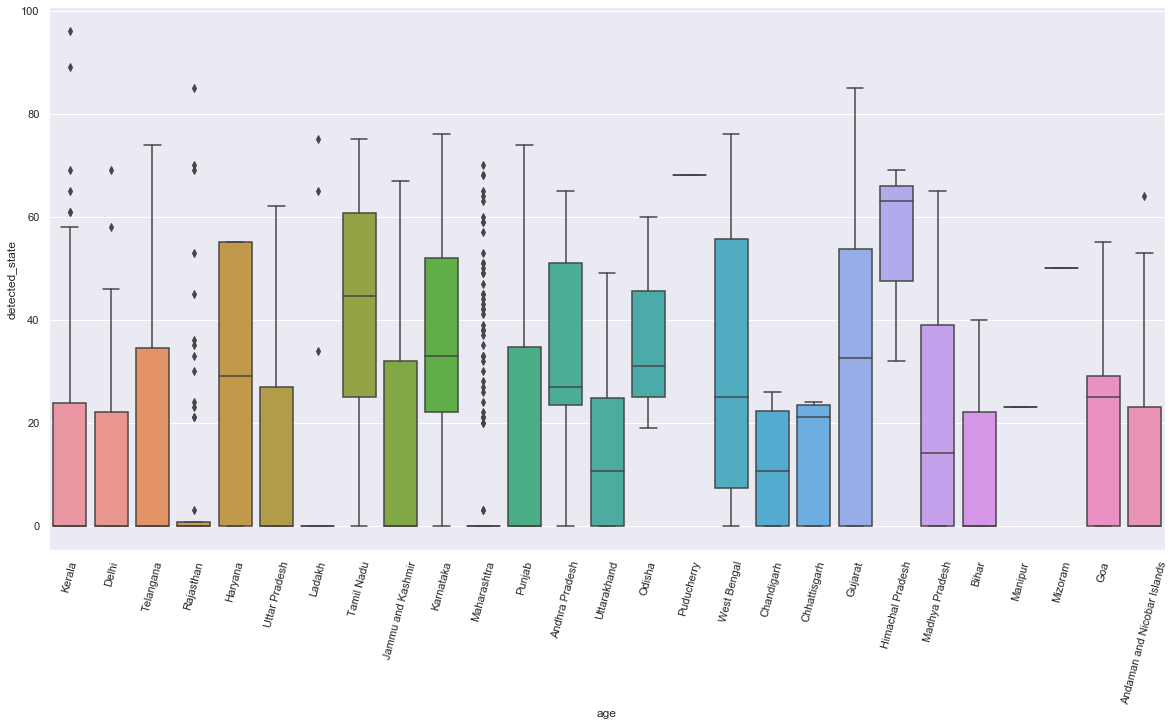

In [357]:
plt.figure(figsize=(20,10))
sns.boxplot(df_individual_tmp['detected_state'],df_individual_tmp['age'])
plt.xlabel("age")
plt.ylabel("detected_state")
plt.xticks(rotation=75)
plt.show()

In [358]:
df_individual_tmp['diagnosed_date']=pd.to_datetime(df_individual_tmp['diagnosed_date'],dayfirst=True,infer_datetime_format=True)

In [359]:
# df_individual_tmp = df_individual_tmp.groupby(["diagnosed_date","detected_state"])["current_status"].sum().reset_index()
# tmp = df_india_date_wise.groupby(['Date'])["Active Cases","Cured","Deaths","State/UnionTerritory"].sum().reset_index()

In [360]:
df_individual_tmp['current_status'].value_counts()

Hospitalized    1023
Recovered         43
Deceased          18
Migrated           1
Name: current_status, dtype: int64

In [361]:
df_individual_tmp['detected_state'].value_counts()

Kerala                         202
Maharashtra                    196
Karnataka                       83
Uttar Pradesh                   69
Telangana                       67
Gujarat                         58
Rajasthan                       56
Tamil Nadu                      50
Delhi                           49
Madhya Pradesh                  39
Jammu and Kashmir               38
Punjab                          38
Haryana                         35
Andhra Pradesh                  19
West Bengal                     18
Ladakh                          13
Bihar                           11
Andaman and Nicobar Islands      9
Chandigarh                       8
Chhattisgarh                     7
Uttarakhand                      6
Goa                              5
Himachal Pradesh                 3
Odisha                           3
Puducherry                       1
Mizoram                          1
Manipur                          1
Name: detected_state, dtype: int64

In [362]:
deaths_state=df_individual_tmp['detected_state'][df_individual_tmp['current_status']=='Deceased'].value_counts()

In [363]:
deaths_state=dict(deaths_state)

In [364]:
df_age_group.head(20)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [365]:
df_age_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


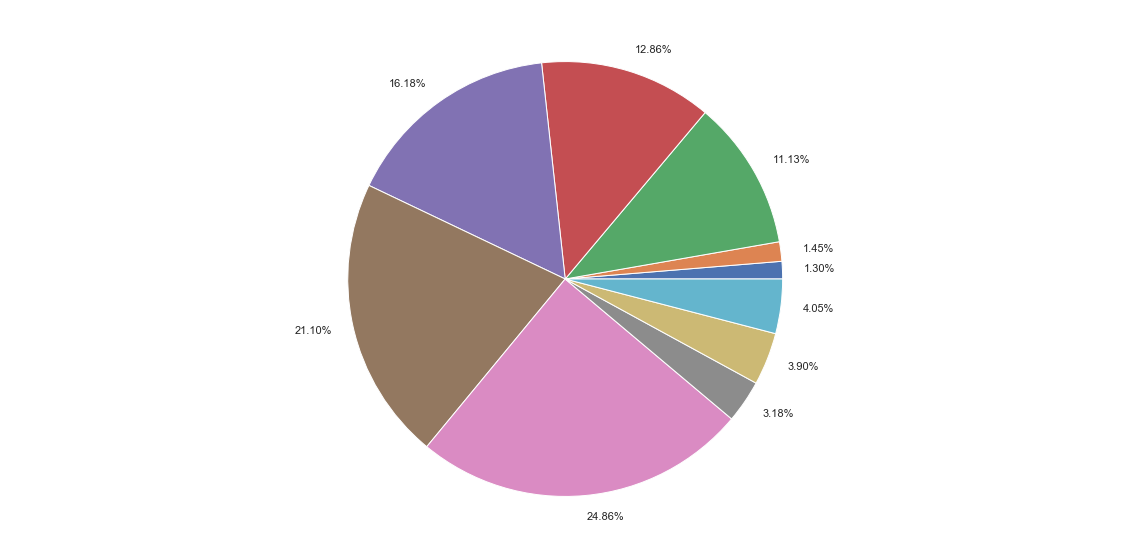

In [366]:
from matplotlib.pyplot import pie, axis
plt.figure(figsize=(20,10))
# fig1,ax1 = plt.subplots()
# ax1.pie(df_age_group['TotalCases'],df_age_group['AgeGroup'], shadow=True)

sums = df_age_group.groupby(df_age_group["Percentage"])["TotalCases"].sum()
axis('equal');
pie(sums, labels=sums.index);

# ax1.equal()
plt.show()

In [367]:
df_imcrt.head(20)

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 0:00,6500,5900,78,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125,12235,150,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 10:00,13316,12426,168,ICMR_website_update_19March_10AM_IST_V2.pdf
3,4,19/03/20 18:00,14175,13285,182,ICMR_website_update_19March_6PM_IST.pdf
4,5,20/03/20 10:00,14376,13486,206,ICMR_website_update_20March_10AM_IST.pdf
5,6,20/03/20 18:00,15404,14514,236,ICMR_website_update_20March_6PM_IST.pdf
6,7,21/03/20 10:00,15701,14811,271,ICMR_website_update_21March_10AM_IST.pdf
7,8,21/03/20 18:00,16911,16021,315,ICMR_website_update_21March_6PM_IST.pdf
8,9,22/03/20 10:00,16999,16109,341,ICMR_website_update_22March_10AM_IST.pdf
9,10,22/03/20 18:00,18127,17237,396,ICMR_website_update_22March_6PM_IST.pdf


In [368]:
df_imcrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
SNo                       16 non-null int64
DateTime                  16 non-null object
TotalSamplesTested        16 non-null int64
TotalIndividualsTested    16 non-null int64
TotalPositiveCases        16 non-null int64
Source                    16 non-null object
dtypes: int64(4), object(2)
memory usage: 896.0+ bytes


In [369]:
df_imcrt['DateTime']= pd.to_datetime(df_imcrt['DateTime'],infer_datetime_format=True,dayfirst=True)

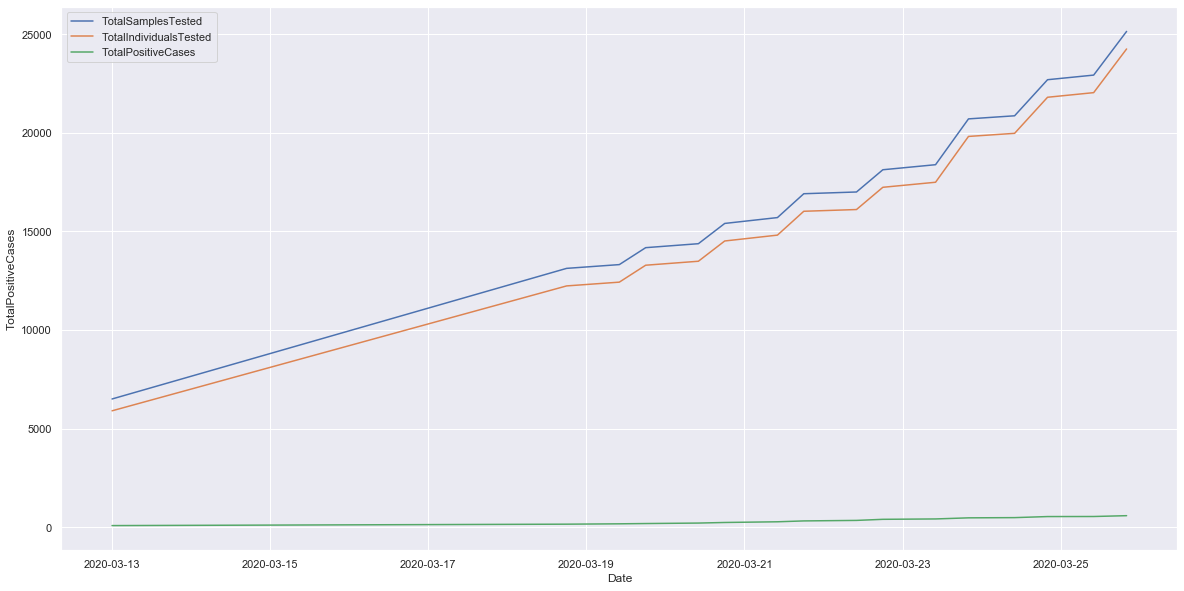

In [370]:
plt.figure(figsize=(20,10))
sns.lineplot(df_imcrt['DateTime'],df_imcrt['TotalSamplesTested'])
sns.lineplot(df_imcrt['DateTime'],df_imcrt['TotalIndividualsTested'])
sns.lineplot(df_imcrt['DateTime'],df_imcrt['TotalPositiveCases'])
plt.legend(["TotalSamplesTested","TotalIndividualsTested","TotalPositiveCases"])
plt.xlabel("Date")
plt.show()

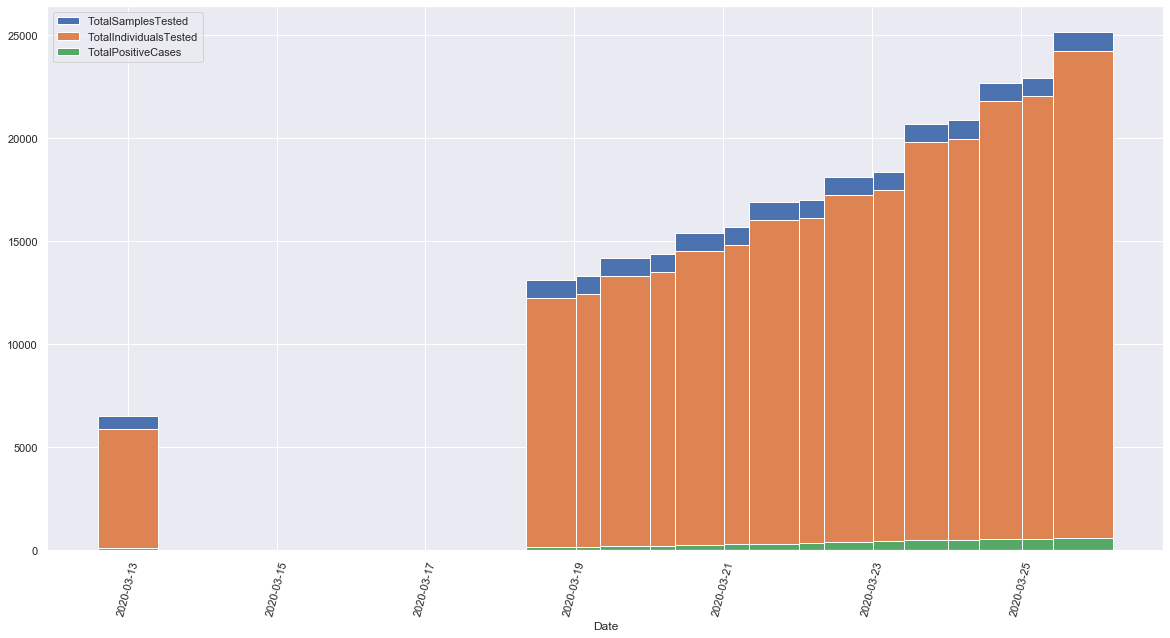

In [371]:
plt.figure(figsize=(20,10))
plt.bar(df_imcrt['DateTime'],df_imcrt['TotalSamplesTested'])
plt.bar(df_imcrt['DateTime'],df_imcrt['TotalIndividualsTested'])
plt.bar(df_imcrt['DateTime'],df_imcrt['TotalPositiveCases'])
plt.legend(["TotalSamplesTested","TotalIndividualsTested","TotalPositiveCases"])
plt.xlabel("Date")
plt.xticks(rotation=75)
plt.show()

In [372]:
df_population.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [373]:
df_population.shape

(36, 8)

In [374]:
df_hospital_bed.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [375]:
df_hospital_bed.shape

(38, 14)

In [376]:
mortality_statewise = df_india_date_wise.groupby(['Date','State/UnionTerritory'])["Active Cases","Cured","Deaths","Total Cases"].sum().reset_index()

In [377]:
mortality_statewise.head()

,Date,State/UnionTerritory,Active Cases,Cured,Deaths,Total Cases
0,2020-01-30,Kerala,1,0,0,1
1,2020-01-31,Kerala,1,0,0,1
2,2020-02-01,Kerala,2,0,0,2
3,2020-02-02,Kerala,3,0,0,3
4,2020-02-03,Kerala,3,0,0,3


In [378]:
mortality_statewise_sum = mortality_statewise.groupby(mortality_statewise['State/UnionTerritory'])["Active Cases","Cured","Deaths","Total Cases"].sum().reset_index()
# sums = df_age_group.groupby(df_age_group["Percentage"])["TotalCases"].sum()

In [379]:
mortality_statewise_sum.head(30)

,State/UnionTerritory,Active Cases,Cured,Deaths,Total Cases
0,Andaman and Nicobar Islands,36,0,0,36
1,Andhra Pradesh,156,7,0,163
2,Bihar,63,0,10,73
3,Chandigarh,79,0,0,79
4,Chattisgarh,1,0,0,1
5,Chhattisgarh,46,0,0,46
6,Delhi,495,80,21,596
7,Goa,24,0,0,24
8,Gujarat,426,5,30,461
9,Haryana,374,112,0,486


In [380]:
mortality_statewise_sum['Mortality_Rate']=(mortality_statewise_sum['Deaths']/mortality_statewise_sum['Total Cases'])*100

In [384]:
mortality_statewise_sum.head(30)

,State/UnionTerritory,Active Cases,Cured,Deaths,Total Cases,Mortality_Rate
0,Andaman and Nicobar Islands,36,0,0,36,0.000000
1,Andhra Pradesh,156,7,0,163,0.000000
2,Bihar,63,0,10,73,13.698630
3,Chandigarh,79,0,0,79,0.000000
4,Chattisgarh,1,0,0,1,0.000000
5,Chhattisgarh,46,0,0,46,0.000000
6,Delhi,495,80,21,596,3.523490
7,Goa,24,0,0,24,0.000000
8,Gujarat,426,5,30,461,6.507592
9,Haryana,374,112,0,486,0.000000


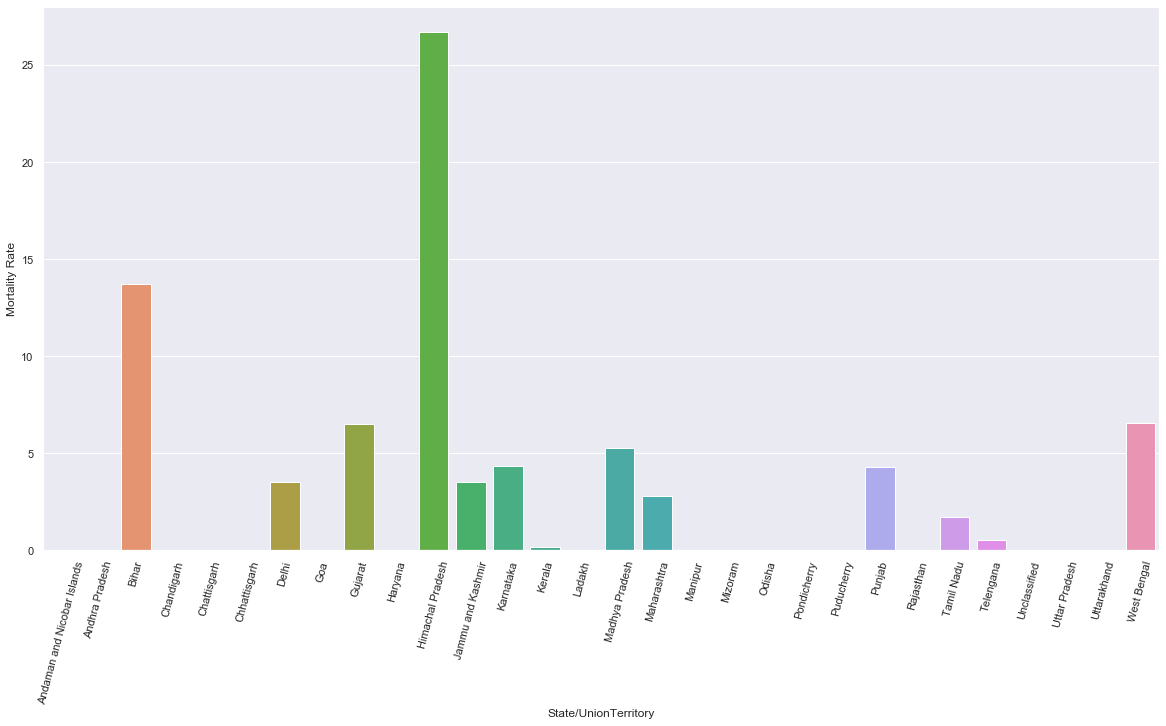

In [383]:
plt.figure(figsize=(20,10))
sns.barplot(mortality_statewise_sum['State/UnionTerritory'],mortality_statewise_sum['Mortality_Rate'])
plt.xlabel("State/UnionTerritory")
plt.ylabel("Mortality Rate")
plt.xticks(rotation=75)
plt.show()

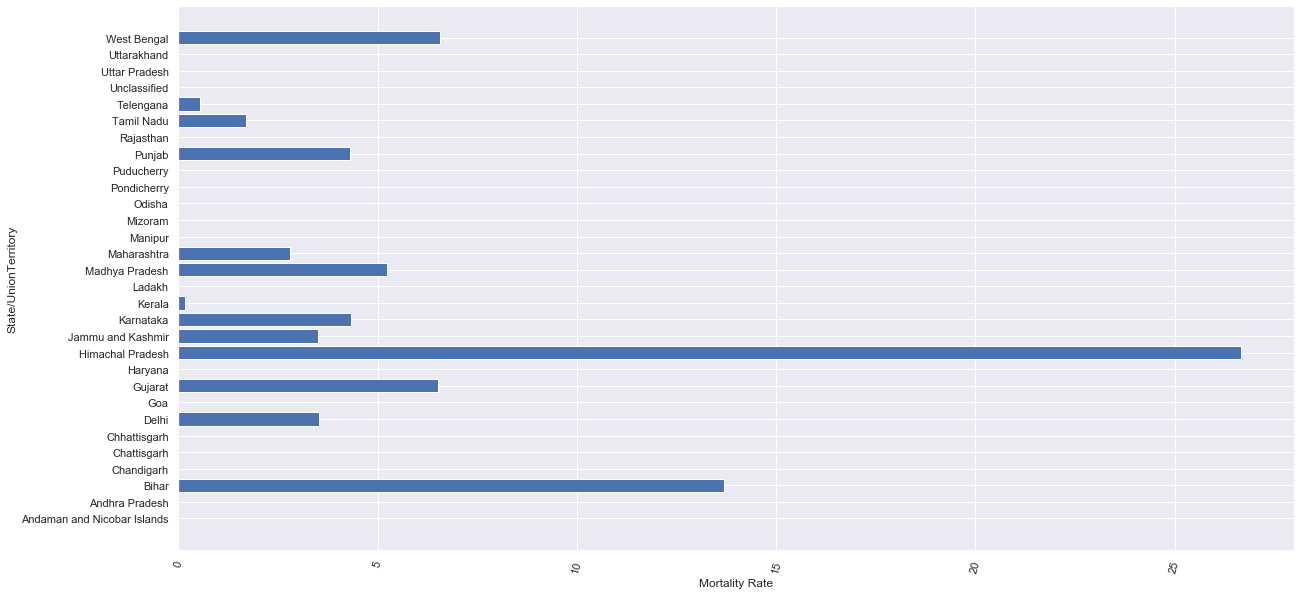

In [386]:
plt.figure(figsize=(20,10))
plt.barh(mortality_statewise_sum['State/UnionTerritory'],mortality_statewise_sum['Mortality_Rate'])
plt.ylabel("State/UnionTerritory")
plt.xlabel("Mortality Rate")
plt.xticks(rotation=75)
plt.show()